<h1>18 June</h1>

<h2>K   nearest nbr </h2>

In [1]:
import pandas as pd

In [2]:
df= pd.read_csv("C:\\Users\\abhishek maurya\\Desktop\\Sale.csv")

FileNotFoundError: File b'C:\\Users\\abhishek maurya\\Desktop\\Sale.csv' does not exist

In [ ]:
df

In [ ]:
df.info()

In [ ]:
df.corr()#for co relation bw numeric values

In [ ]:
df1= df.iloc[0:10000,2:]# creating diffr data set only for saving time

In [ ]:
df1

In [ ]:
x=df1.iloc[:,1:].values

In [ ]:
y=df1.iloc[:,0]

In [ ]:
x

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

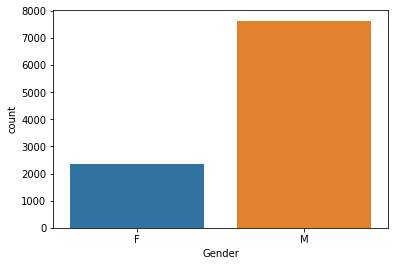

In [39]:
sns.countplot(x="Gender",data=df1)

M    7636
F    2364
Name: Gender, dtype: int64

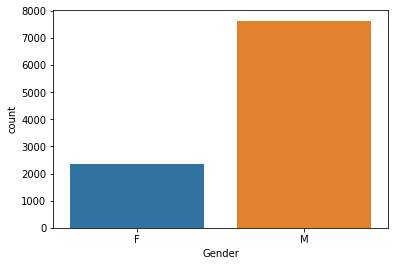

In [45]:
sns.countplot(x="Gender",data=df1)
df1.Gender.value_counts()#for counting Gender values

<h1>Data for K_NN alorithm</h1>

In [55]:
data_knn=df1[["Occupation","Purchase","Gender"]]

In [56]:
x=data_knn[["Occupation","Purchase"]].values

In [57]:
y=data_knn[["Gender"]].values

In [59]:
data_knn.head(2)

,Occupation,Purchase,Gender
0,10,8370,F
1,10,15200,F


In [60]:
from sklearn .model_selection import train_test_split

In [61]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=.3)

In [65]:
#import KNN  library frfom sklearn 
from sklearn.neighbors import KNeighborsClassifier

In [215]:
knn=KNeighborsClassifier(n_neighbors=3)

In [216]:
knn.fit(x_train,y_train)

E:\installllll\Anaconda\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """Entry point for launching an IPython kernel.


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

In [217]:
some_value=x_train[15]

In [218]:
knn.predict([some_value])

array(['F'], dtype=object)

In [219]:
y_train[15]

array(['F'], dtype=object)

In [220]:
prediction=knn.predict(x_test)

In [221]:
import seaborn as sn

In [222]:
from sklearn.model_selection import cross_val_predict
y_train_pred=cross_val_predict(knn,x_train,y_train, cv=3)
len(y_train_pred)

E:\installllll\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:850: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
E:\installllll\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:850: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
E:\installllll\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:850: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


7000

In [223]:
from sklearn import metrics
cm=metrics.confusion_matrix(y_test,prediction)

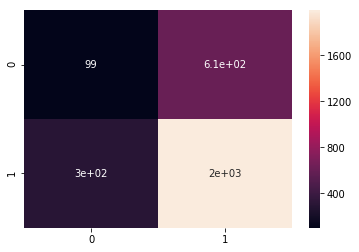

In [224]:
sn.heatmap(cm,annot=True)

In [214]:

knn.predict(x_test)
knn.score(x_test,y_test)#for accuracy

0.579

In [ ]:
plt.plot()

In [152]:
import numpy as np

AttributeError: module 'numpy' has no attribute 'arrange'

In [229]:
train_accuracy=[]

In [230]:
test_accuracy=[]

In [231]:
n=np.arange(1, 30)
for i, k in enumerate(n):
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train,y_train)
    train_accuracy.append(knn.score(x_train,y_train))
    test_accuracy.append(knn.score(x_test,y_test))

E:\installllll\Anaconda\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.
E:\installllll\Anaconda\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.
E:\installllll\Anaconda\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.
E:\installllll\Anaconda\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usi

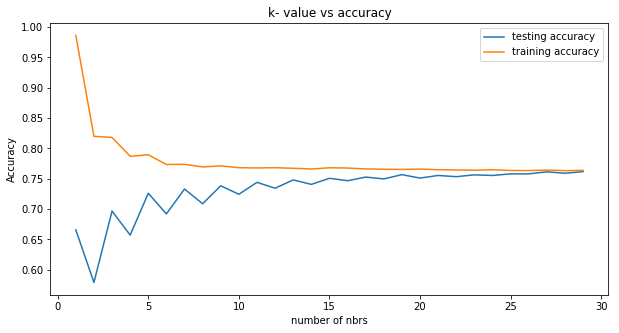

best accuracy is 0.7616666666666667 with k= 29 


In [251]:
plt.figure(figsize=(10,5))
plt.plot(n,test_accuracy,label="testing accuracy")
plt.plot(n,train_accuracy,label="training accuracy")

plt.legend()
plt.title("k- value vs accuracy")
plt.xlabel("number of nbrs")
plt.ylabel("Accuracy")
plt.show()
print("best accuracy is {} with k= {}".format((np.max(test_accuracy)),1+test_accuracy.index(np.max(test_accuracy))))

In [248]:
np.max(test_accuracy)

0.7616666666666667